In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from tensorflow.keras.utils import plot_model

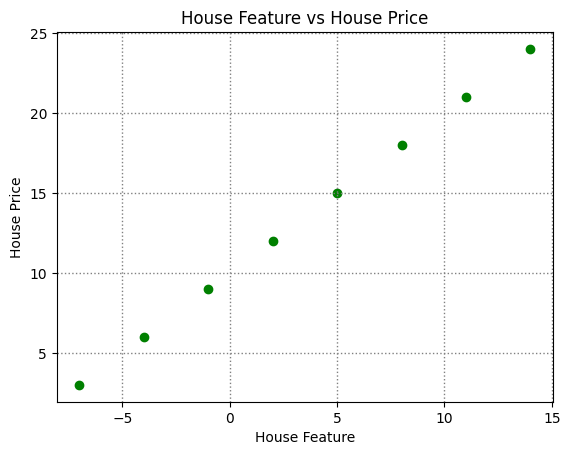

In [ ]:
# Creating features using np.array
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) # Feature is in Capital (X)

# Creating labels/target
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) # NOTE: X and y must be of same size.

# Visualize it using matplotlib
plt.scatter(X,y, color = "green")
plt.xlabel("House Feature")
plt.ylabel("House Price")
plt.title("House Feature vs House Price")
plt.grid(linestyle = ":", color = "gray", linewidth = 1)
plt.show()

In [ ]:
y == X + 10 # Checking the relationship (y = mx + c) --> Linear regression

array([ True,  True,  True,  True,  True,  True,  True,  True])

## INPUT AND OUTPUT SHAPES

In [ ]:
### TURNING THE ABOVE NUMPY ARRAYS INTO TENSORS ###
X = tf.constant(X, dtype = tf.float32)
y = tf.constant(y, dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## STEPS IN MODELLING WITH TENSROFLOW

In [ ]:
# Steps in modelling with TensorFlow
# Creating a model
# Define the input and output layers, as well as any hidden layers of the deep learning model.
# Example: Sequential([...]) with Dense layers.

# Compiling a model
# Define the loss function (the function that tells our model how wrong it is).
# Define the optimizer (tells the model how to improve the patterns it’s learning).
# Define the evaluation metrics (used to interpret model performance, e.g., accuracy, MAE).

# Fitting a model
# Train the model by letting it find patterns between X (features) and y (labels).
# Example: model.fit(X_train, y_train, epochs=100).

In [ ]:
# First setting a seed for reproducibility for intial weight, bias and other TF RNG(Random Number Generation) ops.
tf.random.set_seed(42) # here, 42 is the answer to the universe.

# Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = None, input_shape = (1,)) # same as activation = "linear" i.e. f(z) = z where z is the summation function.
])

# Configuration of model using compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), # here the learning_rate that i provided is default.
              metrics = ["mae"]
              )
# Fitting/training the model
X_reshaped = tf.reshape(X, shape = (-1,1))
model.fit(X_reshaped, y, epochs = 5, verbose = 1) # By default the verbose is 1.


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - loss: 9.3341 - mae: 9.3341
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 9.2016 - mae: 9.2016
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 9.0691 - mae: 9.0691
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 8.9366 - mae: 8.9366
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.8041 - mae: 8.8041


In [ ]:
# #making prediction
# model.predict([17.0])
# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# /tmp/ipython-input-4189367421.py in <cell line: 0>()
#       1 # making prediction
# ----> 2 model.predict([17.0])

# 1 frames
# /usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/__init__.py in get_data_adapter(x, y, sample_weight, batch_size, steps_per_epoch, shuffle, class_weight)
#     123         # )
#     124     else:
# --> 125         raise ValueError(f"Unrecognized data type: x={x} (of type {type(x)})")
#     126
#     127

# ValueError: Unrecognized data type: x=[17.0] (of type <class 'list'>)

In [ ]:
# You’re getting that error because:
# You passed a Python list ([17.0]) — Keras expects a NumPy array or TF tensor.
# Your model was trained with inputs of shape (batch, 1), so for one sample you must pass shape (1, 1)

X_predict = tf.constant([[17.0]]) # the target for this is y = 1*17.0 + 10 i.e. 27(target)
# print(X_predict) --> tf.Tensor([[17.]], shape=(1, 1), dtype=float32)
model.predict(X_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[23.259167]], dtype=float32)

## Improving our model to find the correct pattern

In [ ]:
# We can improve our model by altering the steps we took to create a model.
# 1. *** Creating a model *** Here, we might add more layers, increase the number of hidden units (or neurons)
#  within each of the hidden layers, change the activation function of each layer.
#   2.  *** Compiling a model *** Here, we might change the loss function, optimization function,
#   or perhaps the learning rate of the optimization function.
#   3. *** Fitting a model *** Here, we might fit a model for more epochs (leave it training for longer)
#   or on more data (give the model more exam ples to learn from).

# In the above case, y = weight·x + bias i.e. equivalent to y = mx + c
# This is a straight line (linear relationship).
# A single neuron (Dense(1)) with no activation can perfectly represent this, because it literally computes y_pred = w*x + b.
# So in your house-price example, adding more layers or neurons is not necessary. One weight + one bias is enough.


In [ ]:
model2 = tf.keras.Sequential() # or we can use list method i.e. model2 = tf.keras.Sequential([tf.keras....])
model2.add(tf.keras.layers.Dense(1, activation = "linear", input_shape = (1,))) # input_shape tells that there is one feature
model2.compile(loss = tf.keras.losses.mae, # using alias for mae
               optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1),
               metrics = ["mae"])
model2.fit(X_reshaped, y, epochs = 100, verbose = 1)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - loss: 17.4253 - mae: 17.4253
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 14.7044 - mae: 14.7044
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.3794 - mae: 13.3794
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 12.0544 - mae: 12.0544
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.7294 - mae: 10.7294
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.4044 - mae: 9.4044
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.0794 - mae: 8.0794
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.9937 - mae: 6.9937
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 6.9375 - mae: 6.9375
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 6.8812 - mae: 6.8812
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 6.8250 - mae: 6.8250
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 6.7688 - mae: 6.7688
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# X_predict2 = tf.constant([[17.0, 18.0, 19.0, 20.0]])
# X_predict2
# Now making prediction
# model2.predict(X_predict2)

### NOTE: IT GIVES ERROR ###
# Your model was trained with input shape (n, 1) (meaning: many rows, each row has 1 feature).
# But when you tried prediction, you passed data in a different shape, like *(1, 4)* or (4,).

# So TensorFlow said: “I was trained to expect one column per sample, but you’re giving me something else” → and
# that caused the InvalidArgumentError during the matrix multiply.

In [ ]:
### Correction of code ###
X_predict2 = tf.constant([[17.0], [18.0], [19.0], [20.0]])
print(X_predict2)
# OR
# X_predict2 = tf.constant([17.0, 18.0, 19.0, 20.0])
# X_predict2 = tf.reshape(X_predict2, shape = (-1,1))
# print(X_predict2)

tf.Tensor(
[[17.]
 [18.]
 [19.]
 [20.]], shape=(4, 1), dtype=float32)


In [ ]:
# Now making prediction
model2.predict(X_predict2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[24.9609  ],
       [25.995365],
       [27.029829],
       [28.064295]], dtype=float32)

In [ ]:
### NOW USING ADAM OPTIMIZER ###
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = "linear", input_shape = (1,))
])
model3.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
               metrics = ["mae"])
model3.fit(X_reshaped, y, epochs = 100, verbose = 1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step - loss: 9.9435 - mae: 9.9435
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.4935 - mae: 9.4935
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.0435 - mae: 9.0435
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.5935 - mae: 8.5935
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.1435 - mae: 8.1435
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 7.6935 - mae: 7.6935
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 7.2435 - mae: 7.2435
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 6.9750 - mae: 6.9750
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.9012 - mae: 6.9012
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 6.9793 - mae: 6.9793
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 7.0785 - mae: 7.0785
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.1224 - mae: 7.1224
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/st

In [ ]:
# Making prediction
X_predict3 = tf.constant([17.0, 18.0, 19.0, 20.0, 100.0])
X_predict3 = tf.reshape(X_predict3, shape = (-1,1))
# print(X_predict3)

model3.predict(X_predict3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[ 27.000912],
       [ 28.024986],
       [ 29.04906 ],
       [ 30.07314 ],
       [111.99922 ]], dtype=float32)

In [ ]:
###  IMPROVING OUR MODEL BY INCREASING THE NO OF NEURONS AND LAYERS AND USING RELU AF ###
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu", input_shape = (1,)),
    tf.keras.layers.Dense(1, activation = None)
])

# Compiling the model
model4.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])

# Fitting the model
model4.fit(X_reshaped, y, epochs = 100, verbose = 1)

# It will run without error.
# But ❌ it’s not necessary for your simple problem, because:
# You’re trying to learn a straight line.
# A single neuron (Dense(1)) with no activation already models  y=w⋅x+b.
# Adding:
# 100 neurons
# ReLU activation
# …makes the model much more complex than needed.

# The model will still eventually learn a straight-ish line, but:
# Training may be slower (more parameters to adjust).
# Sometimes it might not converge well with plain SGD unless you tune the learning rate.
### You risk overfitting if the dataset is tiny (model too powerful, data too small). ###

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step - loss: 14.8329 - mae: 14.8329
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 14.2429 - mae: 14.2429
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 13.6577 - mae: 13.6577
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 13.0735 - mae: 13.0735
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 12.4963 - mae: 12.4963
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 11.9130 - mae: 11.9130
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 11.3203 - mae: 11.3203
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 10.7190 - mae: 10.7190
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 10.0949 - mae: 10.0949
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 9.4398 - mae: 9.4398
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 8.7503 - mae: 8.7503
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 8.0254 - mae: 8.0254
Epoch 13/100
1/1 ━━━━━━━

In [ ]:
# Making Prediction using the model
X_predict4 = tf.constant([[17.0, 18.0, 19.0, 20.0]])
X_predict4 = tf.reshape(X_predict4, shape = (-1,1))

model4.predict(X_predict4)
### It is overfitting. ###

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[31.295868],
       [33.07878 ],
       [34.86169 ],
       [36.644604]], dtype=float32)

In [ ]:
### MAKING A FIFTH MODEL BY INCREASING THE NUMBER OF TRAINING DATA ###

X = np.arange(0, 150, 5)
y = X + 10

# Converting X and y into tensors
X = tf.constant(X, dtype = tf.float32)
y = tf.constant(y, dtype = tf.float32)

# Reshaping X and y
X = tf.reshape(X, shape = (-1,1))
y = tf.reshape(y, shape = (-1,1))

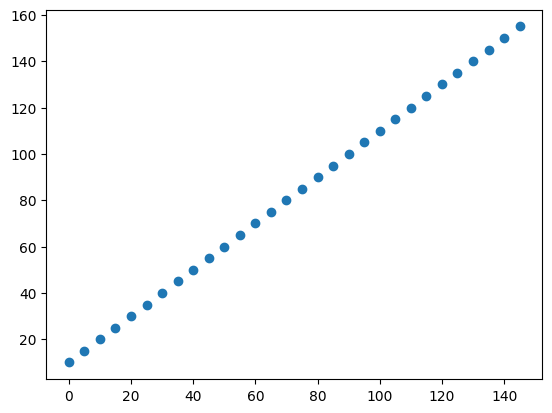

In [ ]:
plt.scatter(X,y)

In [ ]:
# Model 5
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = "linear", input_shape = (1,))
])
model5.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.2),
               metrics = ["mae"])
model5.fit(X, y, epochs = 100, verbose = 1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step - loss: 22.8176 - mae: 22.8176
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.6111 - mae: 9.6111
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.3506 - mae: 8.3506
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.1638 - mae: 11.1638
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8.5612 - mae: 8.5612
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.3202 - mae: 4.3202
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 6.3702 - mae: 6.3702
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.6796 - mae: 7.6796
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 7.1153 - mae: 7.1153
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 5.2972 - mae: 5.2972
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.2121 - mae: 4.2121
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 6.7362 - mae: 6.7362
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52m

In [ ]:
# Making prediction
X_predict5 = tf.constant([17.0, 18.0, 19.0, 20.0, 100.0])
X_predict5 = tf.reshape(X_predict5, shape = (-1,1))
# print(X_predict3)

model5.predict(X_predict5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[ 28.155155],
       [ 29.210876],
       [ 30.266598],
       [ 31.322319],
       [115.78005 ]], dtype=float32)

## EVALUATING OUR MODEL

In [ ]:
# When it comes to evaluation..., there are 3 words you should memorize:
  # "Visualize, Visualize, Visualize"
# It's a good idea to visualize:
#   1. The data - What data are we working with? What does it look like?
#   2. The model itself - What does our model look like?
#   3. The training of a model - How does a model perform while it learns?
#   4. The predictions of the model - How do the predictions of a model line up against the ground truth(The original labels)?

In [ ]:
### NEW LARGER DATA ###
X = tf.range(-100,100,4) # Feature
X = tf.cast(X, dtype = tf.float32)
y = X + 10 # Label/ Target

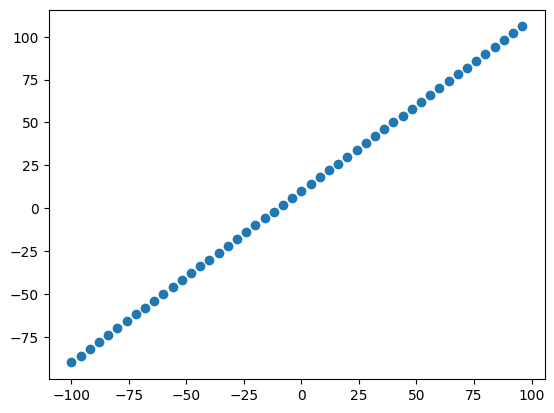

In [ ]:
plt.scatter(X,y)

### THE 3 SETS

* Training Set - The model learns from this data, which is typically 70-80% of the total data you have available. (Analogy - course materials)
* Validation Set - The model gets tuned on this data, which is typically 10-15% of the data available. (Analogy - practice exams)
* Test Set - The model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the data available. (Analogy - Final exam)


In [ ]:
# length of data
len(X)


50

In [ ]:
# Using only Training and Testing Set

# Training Set
X_train= X[:40] # first 80% of the data.
y_train= y[:40] # first 80 % of the data

# Testing Set
X_test = X[40:] # last 20% of the data
y_test = y[40:] # last 20% of the data

## Now Visualizing our Training and Testing Data in Matplotlib

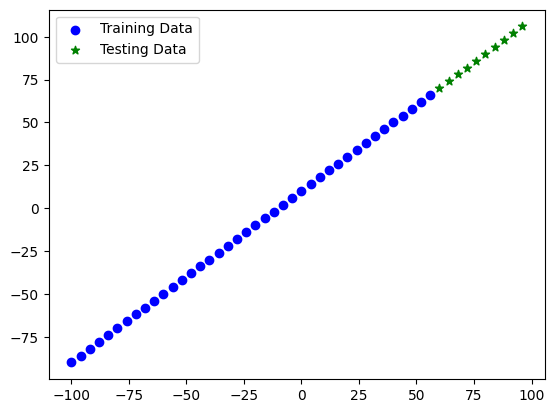

In [ ]:
# plt.figure(figsize = (7,7))
plt.scatter(X_train, y_train, color = "blue", marker = "o", label = "Training Data")
plt.scatter(X_test, y_test, color = "green", marker = "*", label = "Testing Data")
plt.legend()
plt.show()

# VISUALILZING OUR MODEL

In [ ]:
### Creating a model for above train ###
model = tf.keras.Sequential([
    tf.keras.Input(shape = (1,)),
    tf.keras.layers.Dense(1, activation = None) #, input_shape = (1,))
])

# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics = ["mae"])

# Fitting the model
# model.fit(X_train, y_train, epochs = 100, verbose = 1)

model.summary() # it shows nothing as no input_shape = (1,) is defined in model i.e. we haven't told the model that there is only one feature.
# we can either tell the model input_shape for proper summary or we can use model.build(input_shape) for the proper summary

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

From above we can tell that, there are two trainable parameters.
So, y = wX +b

# USING MODEL.BUILD()

In [ ]:
### Another Method ###
### Creating a model for above train ###
model = tf.keras.Sequential([
    # tf.keras.Input(shape = (1,)),
    tf.keras.layers.Dense(1, activation = None) #, input_shape = (1,))
])

# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fitting the model
# model.fit(X_train, y_train, epochs = 100, verbose = 1)

### Using model.build ###
# model.build(input_shape = (1,)) This line throws error.
model.build(input_shape = (None, 1)) # i.e. (batch dimension, feature dimension) i.e. input_shape must exclude the batch dimension.

model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the model
model.fit(X_train, y_train, epochs = 100, verbose = 0)

# Model Summary
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## VISUALIZING THE MODEL USING PLOT_MODEL AND ALSO ADDING THE NAME OF THE MODEL AND LAYERS

Here, plot_model() is a utility function for visualizing the architecture of the model.
from tensorflow.keras.utils import plot_model()
More information in oneNote

In [ ]:
model_prac = tf.keras.Sequential([
    tf.keras.Input(shape = (1,), name = "Input_feature"), # Adding the name of the layer
    tf.keras.layers.Dense(10, activation = None, name = "Hidden_layer_1"), # Adding the name of the layer
    tf.keras.layers.Dense(10, activation = None, name = "Hidden_layer_2"), # Adding the name of the layer
    tf.keras.layers.Dense(1, activation = "linear", name = "Output_neuron") # Adding the name of the layer

], name = "model_for_simple_regression") # Adding the name of the model

# Compiling the model
model_prac.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.SGD(),
                   metrics = ["mae"])

# Summary of the model
model_prac.summary()

Model: "model_for_simple_regression"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_neuron (Dense)           │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

***EXPLANATION OF ABOVE SUMMARY***

**In the first layer** --> There are 10 neurons so 10 biases and each neuron takes 1 inputs resulting in 10 weights and 10 biases = 20 trainable...

**In the second layer** --> There are 10 neurons and as the model is Dense so previous 10 neurons are fully-connected(Dense), with the 10 neurons of this layer so there are 100 connections/weights and 10 biases = 110 trai...

**In the output layer** --> There is a neuron, that is connected with previous 10 neurons resulting in 10 weights and 1 bias = 11 trainable parameters

***At last 20 + 110 + 11 = 141 trainable parameters***

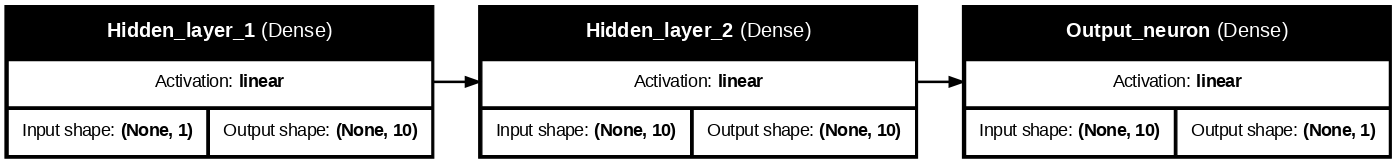

In [ ]:
# Using plot_model
plot_model(model_prac, show_shapes = True, show_layer_names = True, rankdir = "LR",show_layer_activations = True, dpi = 90)

***EXPLANATION OF ABOVE FIGURE***

**In the first layer **--> There are 10 neurons, Inputs: (None, 1) → 1 feature per sample. Neurons: 10 neurons in this layer. Each neuron produces 1 output value (after weight × input + bias).

**Inside math:** each neuron does 𝑧 = 𝑤 ⋅ 𝑥 + 𝑏

**So:** 10 neurons × 1 output each = 10 outputs (not 100).
That’s why the output shape is (None, 10).

**NOTE:** Here, None is referring to batch size.

**In the second layer** --> There are also ten neurons.
Input shape (None, 10):
Takes the 10 outputs from the first layer.

Output shape (None, 10):
Again 10 neurons, so 10 outputs per sample.

**Inside math:** each neuron computes

𝑧 = 𝑤 1 𝑥 1 + 𝑤 2 𝑥 2 + ⋯ + 𝑤 10 𝑥 10 + 𝑏 → 10 different neurons = 10 outputs.

**In the last ouptut layer** --> There is one neuron.

Input shape (None, 10): Takes the 10 outputs from the second hidden layer.

Output shape (None, 1): One neuron, so 1 output per sample.

**Inside math:**
 𝑦 = 𝑤 1 𝑥 1 + 𝑤 2 𝑥 2 + ⋯ + 𝑤 10 𝑥 10 + 𝑏

In [ ]:
### WORKINGS / PRACTICE ###
model_prac2 = tf.keras.Sequential(name = "model_prac2")
model_prac2.add(tf.keras.layers.Dense(10, activation = None, input_shape = (1,), name = "Input_Layer"))
### add() only expects one layer at a time, not a list ###
model_prac2.add(tf.keras.layers.Dense(1, activation = None, name = "Output_Layer"))

# Compiling
model_prac2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Summary of the model
model_prac2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "model_prac2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

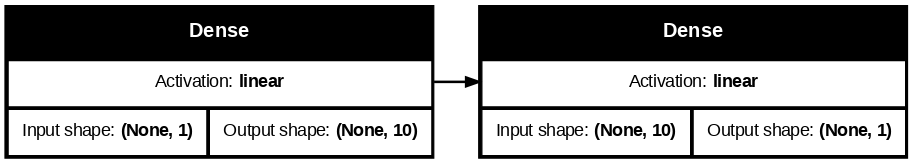

In [ ]:
### Using plot_model() ###
plot_model(model_prac2, show_shapes= True, to_file = "model_prac2.png", show_layer_activations= True, rankdir = "LR", dpi = 90)

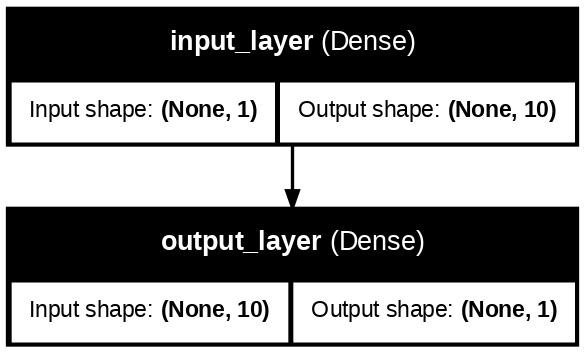

In [ ]:
### PRACTICE MODEL CHAT-GPT ###

# a tiny named model so the boxes look like your screenshot
model_gpt = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), name="input_layer_input"),
    tf.keras.layers.Dense(10, activation=None, name="input_layer"),
    tf.keras.layers.Dense(1,  activation=None, name="output_layer")
], name="simple_model")


# make the diagram
plot_model(
    model_gpt,
    to_file="model.png",        # saves to file
    show_shapes=True,           # shows (batch, features)
    show_layer_names=True,
    rankdir="TB",               # top-to-bottom like your image
    dpi=120
)


In [ ]:
### PRACTICE MODEL NOW FITTING THE MODEL AND THEN TAKING ITS SUMMARY AND plot_model() ###

model_3 = tf.keras.Sequential([
    tf.keras.Input(shape = (1,), name = "Inputlayer"),
    tf.keras.layers.Dense(10, activation = "linear", name = "Hiddenlayer"),
    tf.keras.layers.Dense(1, activation = None, name = "Outputlayer")
])

# Compiling the model
model_3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])

# Fitting the model
model_3.fit(X_train, y_train, epochs = 20, verbose = 0)

In [ ]:
### MODEL SUMMARY ###
model_3.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hiddenlayer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Outputlayer (Dense)             │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

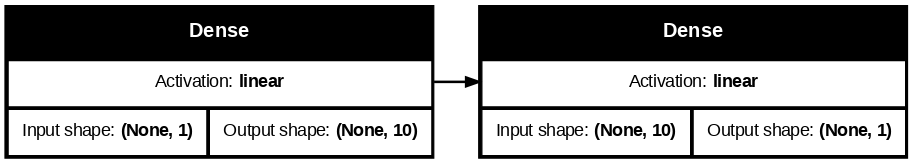

In [ ]:
### USING plot_model() ###
plot_model(model_3,
           show_shapes = True,
           show_layer_activations = True,
           rankdir = "LR",
           dpi = 90
           )

## CONTINUE OF ABOVE TRAIN, TEST SPLIT

In [ ]:
# From the First model which we trained on X_train, which is above if you scroll UP

### COPYING THAT ABOVE MODEL WITH SOME CHANGES ###
### NEW LARGER DATA ###
X = tf.range(-100,100,4) # Feature
X = tf.cast(X, dtype = tf.float32)
y = X + 10 # Label/ Target
print(X)

tf.Tensor(
[-100.  -96.  -92.  -88.  -84.  -80.  -76.  -72.  -68.  -64.  -60.  -56.
  -52.  -48.  -44.  -40.  -36.  -32.  -28.  -24.  -20.  -16.  -12.   -8.
   -4.    0.    4.    8.   12.   16.   20.   24.   28.   32.   36.   40.
   44.   48.   52.   56.   60.   64.   68.   72.   76.   80.   84.   88.
   92.   96.], shape=(50,), dtype=float32)


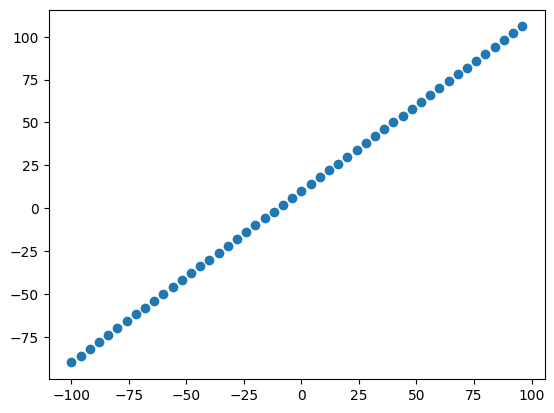

In [ ]:
plt.scatter(X,y)

In [ ]:
# Splitting into Train and Test sets

# Train Data
X_train = X[:40] # First 80%
y_train = y[:40]

# Test Data
X_test = X[40:] # Remaining 20%
y_test = y[40:]

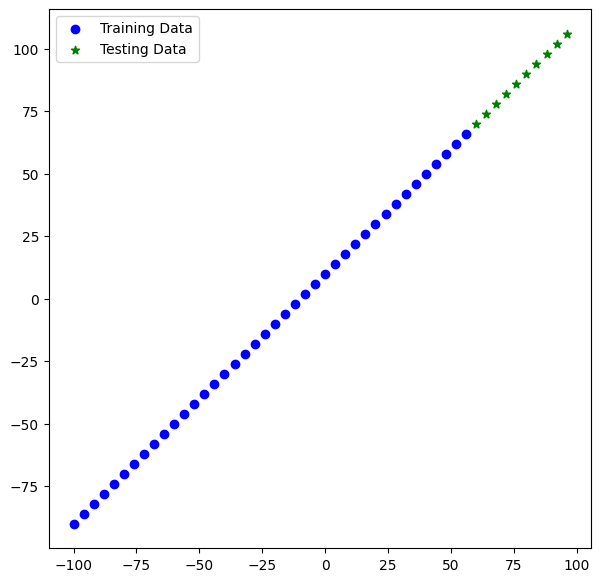

In [ ]:
### VISUALIZING OUR TRAIN AND TEST DATA ###
plt.figure(figsize = (7,7))
plt.scatter(X_train, y_train, color = "blue", marker = "o", label = "Training Data")
plt.scatter(X_test, y_test, color = "green", marker = "*", label = "Testing Data")
plt.legend()
plt.show()

In [ ]:
# Model
model = tf.keras.Sequential([
    tf.keras.Input(shape = (1,), name = "Input_Layer"),
    tf.keras.layers.Dense(1, activation = None, name = "Output_Layer")
])

# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics = ["mae"])

# Fitting the model
model.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 12.0690 - mae: 12.0690 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.8816 - mae: 7.8816
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.3174 - mae: 9.3174
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.0592 - mae: 8.0592
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.3752 - mae: 7.3752
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.6553 - mae: 7.6553
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.8614 - mae: 6.8614
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.1545 - mae: 7.1545
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.1118 - mae: 7.1118
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.3857 - mae: 6.3857
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.8956 - mae: 6.8956
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.8552 - mae: 6.8552
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/

In [ ]:
# model summary
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Output_Layer (Dense)            │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

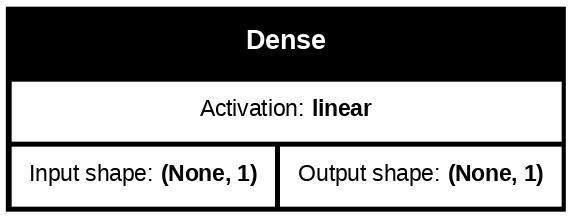

In [ ]:
# Using plot_model
plot_model(model, show_shapes = True, show_layer_activations = True, rankdir = "LR", dpi = 120)

y = weight*x + bias that is equivalent to

y = mx +c i.e. Simple Linear Regression


##VISUALIZING OUR MODEL'S PREDICTION

In [ ]:
# Making some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[ 69.43077 ],
       [ 73.391235],
       [ 77.3517  ],
       [ 81.312164],
       [ 85.27263 ],
       [ 89.23309 ],
       [ 93.19357 ],
       [ 97.15404 ],
       [101.1145  ],
       [105.07497 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

🔑 **NOTE:**If you feel like you're going to reuse some kind of funcionality in the future, it's a good idea to turn it into a **function.**

In [ ]:
""" Plots training data, test data and compares predictions to ground truth labels"""

### FUNCTION DEFINITION ###
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
  plt.figure(figsize = (10,7))
  # Plotting training data in blue
  plt.scatter(train_data, train_labels, c = "b", marker = "o", label = "Training data") # Here, c = "b" means color = "blue"
  # Plotting testind data in green
  plt.scatter(test_data, test_labels, c = "g", marker = "o", label = "Testing data") # Here, c = "g" means color = "green"
  # Plotting model'e prediction in red
  plt.scatter(test_data, predictions, color = "red", marker = "o", label = "Predictions")

  plt.legend()
  plt.show()

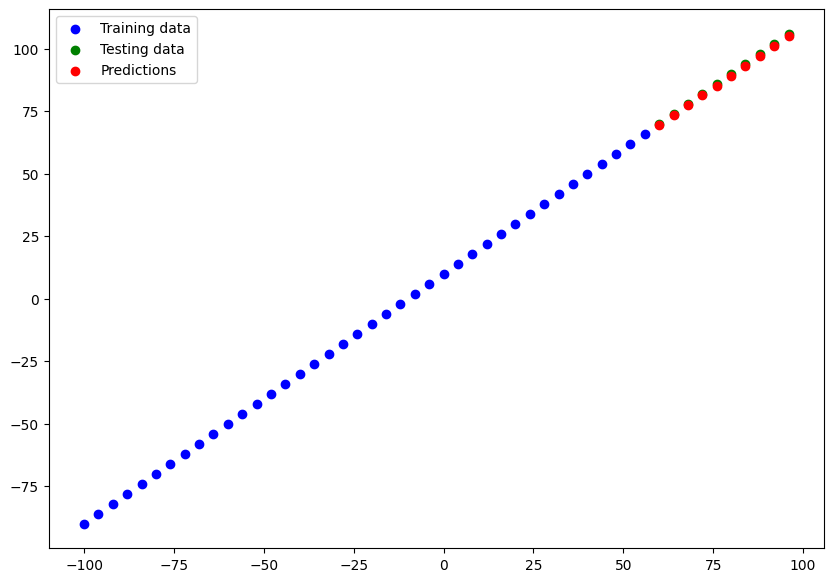

In [ ]:
### CALLING THE FUNCTION ###
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

## EVALUATING OUR MODEL'S PREDICTIONS WITH REGRESSION EVALUATION METRICS

Depending on the problem you're working on, there wil be different evaluation metrics to evaluate your model's performance.

Since, we're working on a regression, two of the main metrics are:
* MAE --> Mean Absolute Error, "on average, how wrong is each of my model's predictions"
* MSE --> Mean Square Error, "Square the average errors". It is also used when larger errors are more significant than smaller errors.

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.7471 - mae: 0.7471


[0.7471328973770142, 0.7471328973770142]

 # CALCULATE THE MEAN ABSOLUTE ERROR

In [ ]:
# tf.metrics.mean_absolute_error(y_test, y_pred)
# NOTE: It will throw error as the funcion has been removed or deprecated in the lates TensorFlow
# NOTE: It is from core tensorflow not from keras and metrics is module/sub-module and mae..() is function.

In [ ]:
# create metric object
mae = tf.keras.metrics.MeanAbsoluteError()

# update with true and predicted values
mae.update_state(y_test, y_pred)

# get the result
print("MAE:", mae.result().numpy())


MAE: 0.7471329


In [ ]:
### We can also use the below code for direct and simultaneous calling of update_state() and result() methods ###
mae(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7471328973770142>

# MEAN SQUARE ERROR

In [ ]:
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_test, y_pred)
print("MSE:", mse.result().numpy())

MSE: 0.5711013


# RUNNING EXPERIMENTS TO IMPROVE OUR MODEL

**Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...**

**1. Get more data -** get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

**2. Make your model larger (using a more complex model) -** this might come in the form of more layers or more hidden units in each layer.

**3. Train for longer -** give your model more of a chance to find patterns in the data. (epochs...)


In [ ]:
### MODEL_1 --> 1 DENSE LAYER TRAINED FOR 100 EPOCHS ###

# Setting the random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.Input(shape = (1,), name = "Input"),
    tf.keras.layers.Dense(1, activation = "linear", name = "Output")
], name = "model_1")

# Compiling the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# Summary of the model
model_1.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

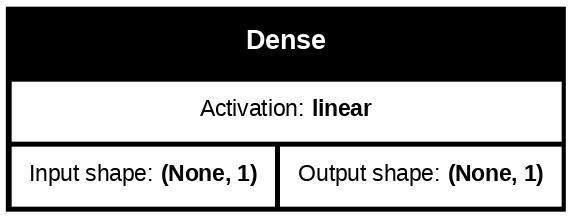

In [ ]:
# Visualizing the model_1 using plot_model
plot_model(model_1, show_shapes = True, show_layer_activations = True, rankdir = "LR", dpi = 120)

In [ ]:
# Fitting the model on train data
model_1.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 58.1089 - mae: 58.1089 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 23.6027 - mae: 23.6027
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.9852 - mae: 11.9852
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.8800 - mae: 8.8800
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.3506 - mae: 10.3506
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.8913 - mae: 9.8913
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.5563 - mae: 11.5563
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.5323 - mae: 8.5323
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.0010 - mae: 10.0010
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.7019 - mae: 11.7019
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.6420 - mae: 8.6420
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.1108 - mae: 10.1108
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


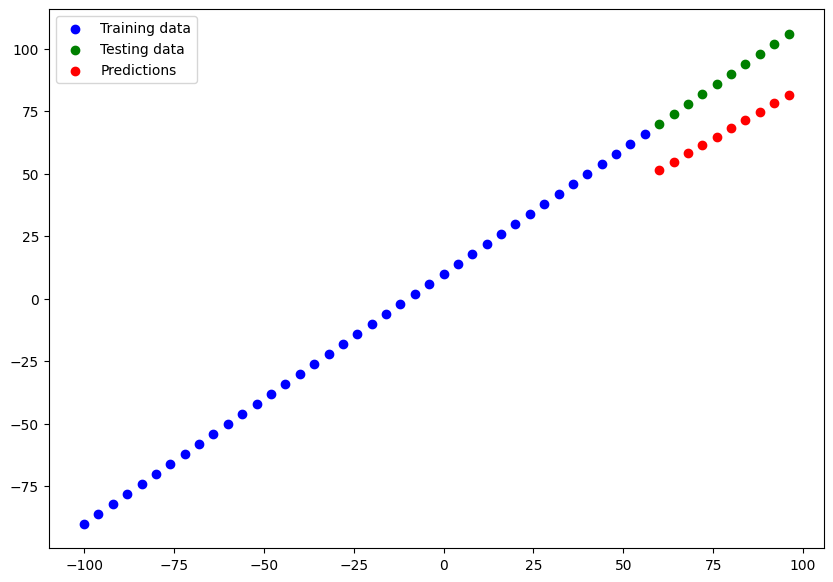

In [ ]:
# Make and plot predictions
y_pred_1 = model_1.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred_1) # This is the a custom made function that i made earlier.

In [ ]:
# Calulate model_1 evaluation metrics
# mae
mae_1 = tf.keras.metrics.MeanAbsoluteError()
mae_1.update_state(y_test, y_pred_1)
print("MAE:", mae_1.result().numpy())

#mse
mse_1= tf.keras.metrics.MeanSquaredError()
mse_1.update_state(y_test, y_pred_1)
print("MSE:", mse_1.result().numpy())

MAE: 21.515465
MSE: 466.53156


In [ ]:
# Using model_1.evaluate() --> In model_1.compile() we have kept mae as metrics and loss
model_1.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - loss: 21.5155 - mae: 21.5155


[21.515464782714844, 21.515464782714844]

In [ ]:
### MODEL_2 --> 2 layers with 1st layer having 10 neurons and second layer having 1 neuron

# Set the random seed
tf.random.set_seed(42)

# Creating the model
model_2 = tf.keras.Sequential(name = "model_2")
model_2.add(tf.keras.Input(shape = (1,), name = "Input"))
model_2.add (tf.keras.layers.Dense(10, activation = None, name = "HiddenLayer"))
model_2.add(tf.keras.layers.Dense(1, activation = "linear", name = "Output"))

# Compiling the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# Summary of the model
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ HiddenLayer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the model on training data
model_2.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 38.1574 - mse: 2063.1152 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 20.6139 - mse: 594.8538
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 21.1398 - mse: 602.3135
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.3437 - mse: 282.5597 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 18.6121 - mse: 462.6740
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 13.1832 - mse: 257.7112
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 15.1861 - mse: 318.8546
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 15.9825 - mse: 344.0988 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.0121 - mse: 218.5130 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.0088 - mse: 309.2198 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.0697 - mse: 192.6098
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 14.9159 - mse: 305.5386
Epoch 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


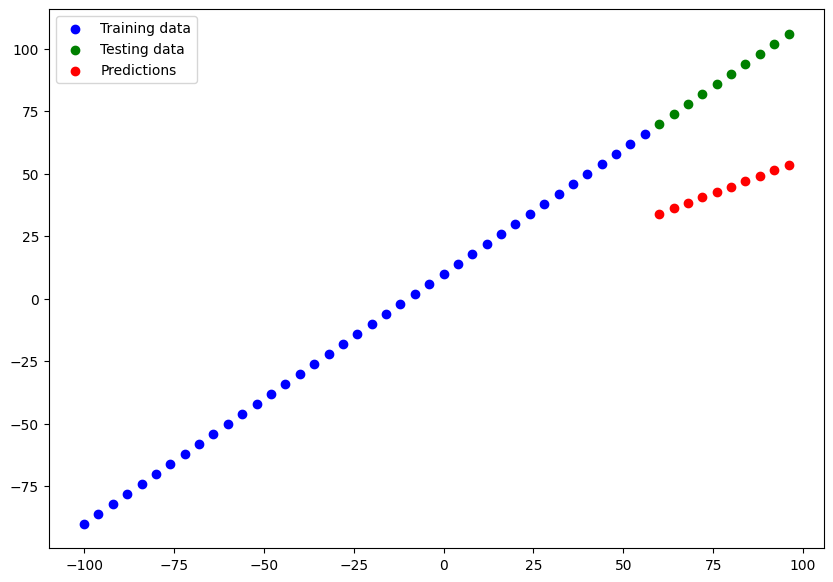

In [ ]:
# Making and plotting the predictions
y_pred_2 = model_2.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred_2)

In [ ]:
# Calculating the evaluation metrics
model_2.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 44.1992 - mse: 1981.3232


[44.19916915893555, 1981.3232421875]

In [ ]:
# We can also evaluate using model_2.predict() from above and mae or mse
# Calulate model_1 evaluation metrics
# mae
mae_2 = tf.keras.metrics.MeanAbsoluteError()
mae_2.update_state(y_test, y_pred_2)
print("MAE:", mae_2.result().numpy())

#mse
mse_2= tf.keras.metrics.MeanSquaredError()
mse_2.update_state(y_test, y_pred_2)
print("MSE:", mse_2.result().numpy())

### WE GOT THE SAME VALUE ###

MAE: 44.19917
MSE: 1981.3232


In [ ]:
# Now for model_3 --> using two layers and training for 500 epochs

# Using seed for reproducibility
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.Input(shape = (1,), name = "Input"),
    tf.keras.layers.Dense(10, activation = "linear", name = "HiddenLayer"),
    tf.keras.layers.Dense(1, activation = "linear", name = "Output")
], name = "model_3")

# Compiling the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# Summary of the model
model_3.summary()

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ HiddenLayer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Using plot_model() utility function to visualize the model
# from tensorflow.keras.utils import plot_model

# Fitting the model with training data
model_3.fit(X_train, y_train, epochs = 500, verbose = 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


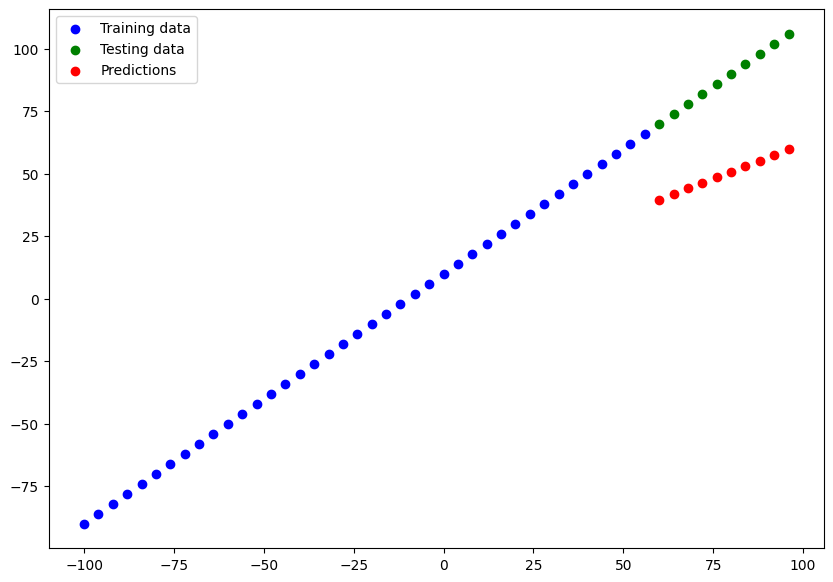

In [ ]:
# Making predictions and plotting the predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred_3)

In [ ]:
### From the figure we can say that the model is overfitting. ###
# Evaluating
model_3.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 38.2703 - mae: 38.2703


[38.27033233642578, 38.27033233642578]

In [ ]:
# We can also evaluate using model_3.predict() from above and mae or mse
# Mean Absolute Error (MAE)
mae_3 = tf.keras.metrics.MeanAbsoluteError()
mae_3.update_state(y_test, y_pred_3)
print("MAE:", mae_3.result().numpy())

# Mean Squared Error (MSE)
mse_3 = tf.keras.metrics.MeanSquaredError()
mse_3.update_state(y_test, y_pred_3)
print("MSE:", mse_3.result().numpy())


MAE: 38.270332
MSE: 1490.454


🔑 **NOTE: ** We should start with small models (small experiments) and make sure they work and increase their scale when necessary.

# COMPARING THE RESULTS OF OUR EXPERIMENTS

We've run a few experiments. Now, let's compare the results.

** USING PANDAS DATAFRAME TO COMPARE THE MODEL **

In [ ]:
# import pandas as pd
list = [["model_1", mae_1.result().numpy(), mse_1.result().numpy()],
        ["model_2", mae_2.result().numpy(), mse_2.result().numpy()],
        ["model_3", mae_3.result().numpy(), mse_3.result().numpy()]]

### Now using this result to make pandas DataFrame object ###
compare_result = pd.DataFrame(list, columns = ["Model","MAE", "MSE"])
compare_result

,Model,MAE,MSE
0,model_1,21.515465,466.531555
1,model_2,44.199169,1981.323242
2,model_3,38.270332,1490.453979


** By looking at the table I can see that model_1 worked the best. **

🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).


# SAVING OUR MODEL

Saving our model allows us to use them outside of Google Colab (or wherever they were trained), such as in web application or mobile app or TensorFlow.js: For use in web browsers and Node.js applications.

** COMMON MODEL FORMATS **
1. (.keras format)
2. (SavedModel format)
3. (HDF5, .h5 format)

In [ ]:
### SAVING MODEL USING SavedModel format
# model_1.save("best_model_SavedModel format") --> It gives error as, in the latest version we can't use save() method for SavedModel format.

### We need to use export() method. ###
model_1.export("best_model_SavedModel_format")

Saved artifact at 'best_model_SavedModel_format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='Input')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137914049891600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137913870864400: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
### Using  HDF5 (.h5) format ###
model_1.save("best_model_HDF5_format.h5")

In [ ]:
### Using .keras format to save ###
### Also using the save_model() function from keras.saving module ###

# tf.keras.saving.save_mode(model_1, "best_model_keras_format.keras") --> It will throw error.

from keras.saving import save_model
save_model(model_1, "best_model_keras_format.keras")

# LOADING A SAVED MODEL

While loading the saved model in all the three formats i.e.
 1. Keras
 2. HDF5
 3. SavedModel format
 * We use tf.keras.models.load_model() function ?

In [ ]:
# loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format") # error
# loaded_SavedModel_format.summary() # error

# ### CAUSE OF ERROR ###

# The Keras team separated concerns:
# .keras / .h5 → for saving and reloading full Keras models (for training or inference).
# SavedModel (model.export()) → for deployment/inference in cross-platform TensorFlow runtimes (TF Serving, TF Lite, TF.js).
# This means SavedModel is not intended to be reloaded for further training via load_model() — only for serving.

# ✅ Bottom line
# If you want to train + reload → use .keras or .h5.
# If you want to deploy/infer only → use model.export() (SavedModel) and reload via TFSMLayer or tf.saved_model.load   (tf core).

In [ ]:
loaded_keras_format = tf.keras.models.load_model("best_model_keras_format.keras")
loaded_keras_format.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4 (20.00 B)

In [ ]:
loaded_hdf5_format = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_hdf5_format.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_1.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
no_compile_keras_format = tf.keras.models.load_model("best_model_keras_format.keras", compile = False)
no_compile_keras_format.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

# COMPARING THE RESULTS OF THE LOADED MODEL AND ORIGINAL MODEL_1

In [ ]:
### CHECKING FOR KERAS LOADED MODEL ###
loaded_keras_preds = loaded_keras_format.predict(X_test)
model_1_preds = model_1.predict(X_test)

### COMPARING THEM ###
loaded_keras_preds == model_1_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
### CHECKING F0R HDF5 LOADED MODEL ###
loaded_hdf5_preds = loaded_hdf5_format.predict(X_test)

### COMPARING THEM ###
loaded_hdf5_preds == model_1_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
### CHECKING FOR KERAS COMPILE = FALSE LOADED MODEL ###
no_compile_keras_preds = no_compile_keras_format.predict(X_test)

### COMPARING THEM ###
no_compile_keras_preds == model_1_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# MAKING A CLASS THAT COMPARES THE PREDICTION OF LOADED MODEL AND ORIGINAL MODEL

In [ ]:
class ComparePrediction:
  def __init__(self, loaded_model, original_model): # Making a constructor
    self.loaded_model = loaded_model # Public attributes
    self.original_model = original_model # Public attributes

  def predictions(self): # Method 1
    loaded_preds = self.loaded_model.predict(X_test)
    original_preds = self.original_model.predict(X_test)
    return loaded_preds, original_preds

  def compare_predictions(self): # Method 2
    loaded_preds, original_preds = self.predictions()
    return loaded_preds == original_preds

In [ ]:
### COMPARING THE LOADED KERAS FORMAT AND ORIGINAL MODEL_1 ###
compare_pred_obj = ComparePrediction(loaded_keras_format, model_1)

In [ ]:
compare_pred_obj.compare_predictions() # Using method 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
loaded_preds, original_preds = compare_pred_obj.predictions() # Using method 1
loaded_preds, original_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


(array([[51.463875],
        [54.8018  ],
        [58.139725],
        [61.47765 ],
        [64.815575],
        [68.153496],
        [71.49142 ],
        [74.829346],
        [78.167274],
        [81.505196]], dtype=float32),
 array([[51.463875],
        [54.8018  ],
        [58.139725],
        [61.47765 ],
        [64.815575],
        [68.153496],
        [71.49142 ],
        [74.829346],
        [78.167274],
        [81.505196]], dtype=float32))

# DOWNLOAD A MODEL (OR ANY OTHER FILE) FROM GOOGLE COLAB

To download we can:-
1. Right click and download the files.
2. Use code to download.
3. Mounting to google drive and copying it from there.

In [ ]:
### USING CODE TO DOWNLOAD FILE FROM GOOGLE COLAB ###

from google.colab import files # here google.colab is a python module and files is a python sub-module
files.download("best_model_keras_format.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
### Save a file from google colab to Google colab to Google drive (requires mounting Google Drive)
!cp /content/best_model_keras_format.keras /content/drive/MyDrive/tensor_flow

In [ ]:
!ls /content/drive/MyDrive/tensor_flow

best_model_keras_format.keras


# A LARGER EXAMPLE

In [ ]:
### Importing required libraries ###
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
### Importing a CSV file directly from a GitHub repository using its raw file URL. ###
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# CHECKING IF THERE IS ANY NULL VALUES

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.columns.isnull()

array([False, False, False, False, False, False, False])

In [ ]:
df.isnull().any()

,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False


# CHECKING FOR DUPLICATE VALUES

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


In [ ]:
### NOW IT THE ABOVE (df DataFrame) OBJECT WE HAVE SOME COLUMNS THAT ARE NUMERICAL LIKE INT64, FLOAT64 AND SOME COLUMNS THAT ARE OBJECT ###
# Let's try one-hot encode our dataset so its all numbers

df_one_hot = pd.get_dummies(df, dtype = int) # Here, by default the dtype = bool
df_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Charges column
df_charges = df_one_hot["charges"]
print(type(df_charges))

<class 'pandas.core.series.Series'>


In [ ]:
# Converting df_charges into numpy array
np_charges = np.array(df_charges)
print(type(np_charges))
print(np_charges)

<class 'numpy.ndarray'>
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [ ]:
# Dropping the charges column inplace
df_one_hot.drop("charges", axis = 1, inplace = True)

In [ ]:
# Adding the charges column at last index
df_one_hot.loc[:,"charges"] = np_charges

In [ ]:
df_one_hot.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,1,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,0,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,0,1,1,0,0,0,1,0,4449.46200
3,33,22.705,0,0,1,1,0,0,1,0,0,21984.47061
4,32,28.880,0,0,1,1,0,0,1,0,0,3866.85520


In [ ]:
# Checking the number of features
features = df_one_hot.drop("charges", axis = 1)
print(features.columns)

# For count
count = 0
for _ in features.columns:
  count = count + 1
print(count)

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
11


In [ ]:
# Other ways to count the number of column in a dataframe
print(features.shape[1])
print(len(features.columns))

11
11


In [ ]:
# Creating features(X), and label/target(y) values

X_pd = df_one_hot.drop("charges", axis = 1) # Here, it is features
y_pd = df_one_hot["charges"] # Here, it is label/target

# The above features and target is in pandas DataFrame and pandas Series
print(type(X_pd))
print(type(y_pd))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
# Converting them into numpy
X_np = np.array(X_pd)
y_np = np.array(y_pd)

print(X_np)
print(y_np)
print(X_np.dtype)
print(y_np.dtype)

[[19.   27.9   0.   ...  0.    0.    1.  ]
 [18.   33.77  1.   ...  0.    1.    0.  ]
 [28.   33.    3.   ...  0.    1.    0.  ]
 ...
 [18.   36.85  0.   ...  0.    1.    0.  ]
 [21.   25.8   0.   ...  0.    0.    1.  ]
 [61.   29.07  0.   ...  1.    0.    0.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
float64
float64


In [ ]:
# Converting the features and target into tensors
X = tf.constant(X_np, dtype = tf.float32)
y = tf.constant(y_np, dtype = tf.float32)

X, y

(<tf.Tensor: shape=(1338, 11), dtype=float32, numpy=
 array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
        [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
        ...,
        [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
        [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]], dtype=float32)>,
 <tf.Tensor: shape=(1338,), dtype=float32, numpy=
 array([16884.924 ,  1725.5522,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.36  ], dtype=float32)>)

In [ ]:
### NOW SPLITTING THE DATA INTO TRAINING AND TEST SET ###
### NOTE: We need to shuffle the data before splitting for unbiased modeling ###

tf.random.set_seed(42)
dataset_obj = tf.data.Dataset.from_tensor_slices((X,y))
dataset_obj

<_TensorSliceDataset element_spec=(TensorSpec(shape=(11,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [ ]:
### CHECKING THE NUMBER OF ELEMENTS IN dataset_obj(made from --> from_tensor_slices()) ###
print(dataset_obj.cardinality())
print(dataset_obj.cardinality().numpy())

tf.Tensor(1338, shape=(), dtype=int64)
1338


In [ ]:
### Now shuffling the dataset_obj using shuffle() method and a buffer_size of 1338 ###
tf.random.set_seed(42) # For reproducibility
shuffled_dataset_obj = dataset_obj.shuffle(buffer_size = 1338, seed = 42, reshuffle_each_iteration = False)
shuffled_dataset_obj

<_ShuffleDataset element_spec=(TensorSpec(shape=(11,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [ ]:
for features, label in shuffled_dataset_obj.take(3):
  print(f"Features: {features} \nLabel: {label}")

# take(3) instance method -
# take(3) creates a new dataset with only the first 3 elements from that shuffled_dataset_obj.

Features: [54.   32.68  0.    1.    0.    1.    0.    1.    0.    0.    0.  ] 
Label: 10923.93359375
Features: [18.    30.115  0.     1.     0.     1.     0.     1.     0.     0.
  0.   ] 
Label: 2203.471923828125
Features: [42.   29.48  2.    1.    0.    1.    0.    0.    0.    1.    0.  ] 
Label: 7640.30908203125


In [ ]:
### Train and Test Split ###
train_dataset = shuffled_dataset_obj.take(1000) # creates a new dataset with the first 1000 elements from that shuffled_dataset_obj.
test_dataset = shuffled_dataset_obj.skip(1000)  # creates a new dataset while skipping the first 1000 elements from the shuffled_dataset_obj
# i.e. with the remaining 338 elements

In [ ]:
### Making batches of train and test dataset ###
train_ds = train_dataset.batch(1)
test_ds = test_dataset.batch(1)

# NOTE:- Here, batch() is an instance method of Dataset class

In [ ]:
### MAKING A SEQUENTIAL MODEL ###
model = tf.keras.models.Sequential([
    tf.keras.Input(shape = (11,), name = "Input"),
    tf.keras.layers.Dense(10, activation = "linear", name = "HiddenLayer"),
    tf.keras.layers.Dense(1, activation = "linear", name = "Output")
])

# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics = ["mae"])
# summary
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ HiddenLayer (Dense)             │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

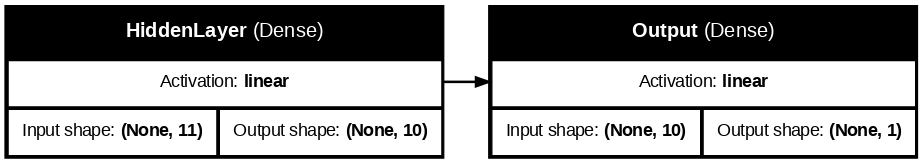

In [ ]:
# Using plot_model to understand the model visually
plot_model(model, show_shapes = True, show_layer_names = True, rankdir = "LR",show_layer_activations = True, dpi = 90)

In [ ]:
# Fitting the model
model.fit(train_ds, epochs = 10, verbose = 1)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8101.0078 - mae: 8101.0078
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5475.1450 - mae: 5475.1450
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4195.4561 - mae: 4195.4561
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4103.0405 - mae: 4103.0405
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4073.9453 - mae: 4073.9453
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4062.7161 - mae: 4062.7161
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4069.6790 - mae: 4069.6790
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4015.8870 - mae: 4015.8870
Epoch 9/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4038.4314 - mae: 4038.4314
Epoch 10/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3952.1995 - mae: 3952.1995


# Buildin a NN on the above dataset from YT- Daniel Bourke

In [ ]:
# Create X and y values (features and labels)
X = df_one_hot.drop("charges", axis = 1)
y = df_one_hot["charges"]

In [ ]:
# Viewing X
X.head(7)
# It is a DataFrame object.

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
5,31,25.740,0,1,0,1,0,0,0,1,0
6,46,33.440,1,1,0,1,0,0,0,1,0


In [ ]:
# Viewing y
y.head(7)
# print(type(y)) --> It is Series object.

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
6,8240.58960


In [ ]:
### Using scikit-learn library ###
import sklearn as sk
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Creating a model
insurance_model = tf.keras.models.Sequential([
    tf.keras.Input(shape = (11,), name = "Input"),
    tf.keras.layers.Dense(10, activation = None, name = "Hidden"),
    tf.keras.layers.Dense(1, activation = None, name = "Output")

], name = "insurance_model")

# Compiling the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# Summary of the model
insurance_model.summary()

Model: "insurance_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden (Dense)                  │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

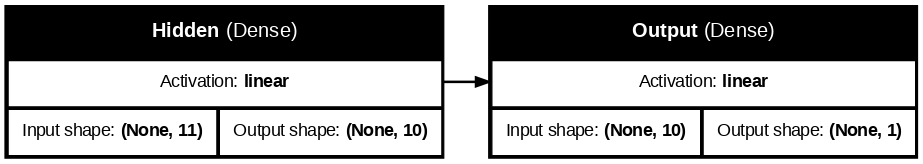

In [ ]:
# Using plot_model function to VISUALIZE the insurance_model
plot_model(insurance_model, show_shapes = True, show_layer_names = True, rankdir = "LR",show_layer_activations = True, dpi = 90)


In [ ]:
# Fitting the model
insurance_model.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10082.5059 - mae: 10082.5059
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7782.5249 - mae: 7782.5249
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7473.7861 - mae: 7473.7861
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7435.1313 - mae: 7435.1313
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7410.9360 - mae: 7410.9360
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7675.8657 - mae: 7675.8657
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7586.8398 - mae: 7586.8398
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7657.5200 - mae: 7657.5200
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7647.0410 - mae: 7647.0410
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7084.9736 - mae: 7084.9736
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7710.2285 - mae: 7710.2285
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [ ]:
# Evaluating the model
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6237.0278 - mae: 6237.0278  


[6024.453125, 6024.453125]

In [ ]:
# Checking the mean and median value of the y_train
y_train.describe()

,charges
count,1070.000000
mean,13346.089736
std,12019.510778
min,1121.873900
25%,4897.667387
50%,9575.442100
75%,16746.657400
max,62592.873090


# Right now our insurance_model isn't performing too well, let's try to improve our model

In [ ]:
### EXPERIMENTING TO IMPROVE OUR MODEL ###
insurance_model2 = tf.keras.Sequential([
    tf.keras.Input(shape = (11,), name = "Input"),
    tf.keras.layers.Dense(100, activation = "linear", name = "Hidden_one"),
    tf.keras.layers.Dense(10, activation = None, name = "Hiidden_two"),
    tf.keras.layers.Dense(1, activation = None, name = "Output")
], name = "insurance_model2")

# Compiling the model
insurance_model2.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
                         metrics = ["mae"])

# Summary of the model
insurance_model2.summary()

Model: "insurance_model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_one (Dense)              │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hiidden_two (Dense)             │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,221 (8.68 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

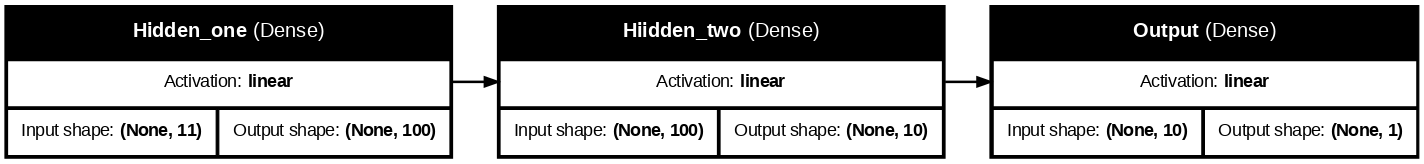

In [ ]:
# Using plot_model() function for visualizing the model
plot_model(insurance_model2, show_shapes= True, show_layer_names=True, show_layer_activations=True, rankdir="LR", dpi=90)

In [ ]:
# Fitting the model
history = insurance_model2.fit(X_train, y_train, epochs = 200, verbose = 1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9695.0918 - mae: 9695.0918  
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6652.1904 - mae: 6652.1904
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5542.7026 - mae: 5542.7026
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4119.9180 - mae: 4119.9180
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3843.2903 - mae: 3843.2903
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3896.2131 - mae: 3896.2131
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3721.5103 - mae: 3721.5103
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3842.1130 - mae: 3842.1130
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4066.3662 - mae: 4066.3662
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3716.5850 - mae: 3716.5850
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4040.1335 - mae: 4040.1335
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

In [ ]:
# Evaluating our model
insurance_model2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3295.2449 - mae: 3295.2449  


[3238.97509765625, 3238.97509765625]

In [ ]:
history

In [ ]:
history.history # Here it is something like history_obj.history attribute i.e. history is a attribute of History class
# It is a dictionary.

{'loss': [8384.677734375,
  6554.66845703125,
  5222.85009765625,
  4300.06201171875,
  3921.908447265625,
  3938.349609375,
  3789.3056640625,
  3853.117919921875,
  4013.220947265625,
  3757.627685546875,
  4011.94580078125,
  3773.16259765625,
  3803.832763671875,
  4316.443359375,
  4242.77734375,
  4112.88720703125,
  4093.681396484375,
  4292.41796875,
  4021.76171875,
  3680.514892578125,
  3776.678466796875,
  3663.71533203125,
  3810.921142578125,
  3625.7138671875,
  3770.772216796875,
  3615.695068359375,
  3695.643310546875,
  3716.42626953125,
  3905.863525390625,
  4111.9033203125,
  4343.17919921875,
  4031.093017578125,
  4043.9453125,
  4125.88818359375,
  4086.027099609375,
  3979.9462890625,
  4073.191650390625,
  3902.091064453125,
  3944.5458984375,
  3858.447021484375,
  3833.156494140625,
  4031.21630859375,
  3953.863037109375,
  3934.180908203125,
  3859.708740234375,
  3822.73681640625,
  3873.121826171875,
  3884.413818359375,
  3802.533935546875,
  3877.6638

Text(0, 0.5, 'loss')

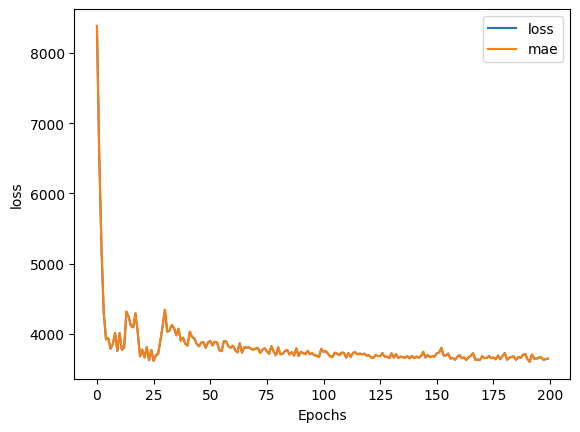

In [ ]:
# Plotting the loss curve per epoch
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("loss")

**🤔 Question: How long should you train for?**

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping Callback, which is a TensorFlow class you can add to your model to stop training once it stops improving a certain metrics.

# PREPROCESSING DATA NORMALIZATION AND STANDARDIZATION

In terms of scaling values, neural network tend to prefer normalization.
If you're not sure on which to use, you could try both and see which performs better.

<Axes: ylabel='Frequency'>

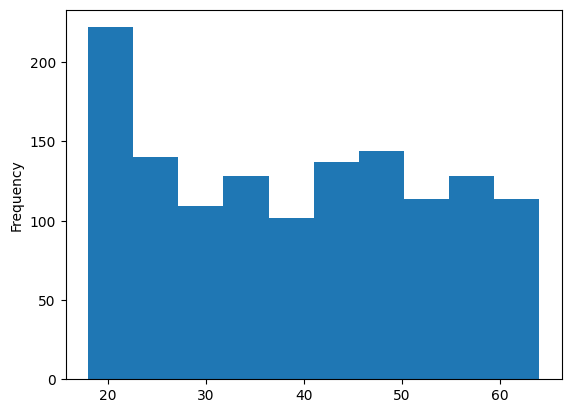

In [ ]:
X["age"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

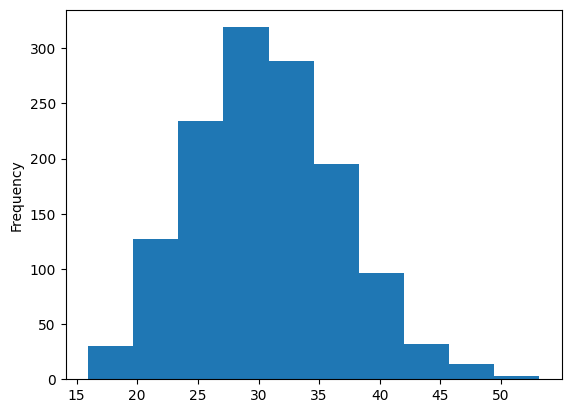

In [ ]:
X["bmi"].plot(kind = "hist")

In [ ]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


<Axes: ylabel='Frequency'>

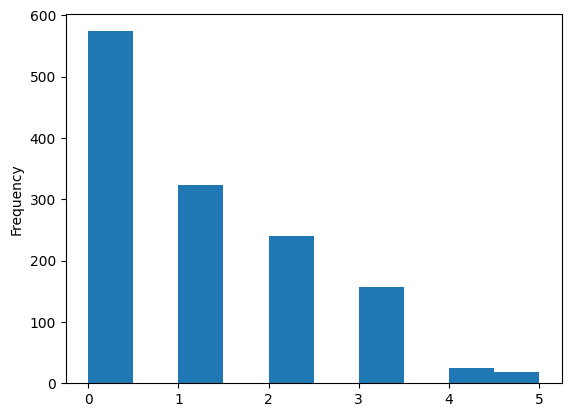

In [ ]:
X["children"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

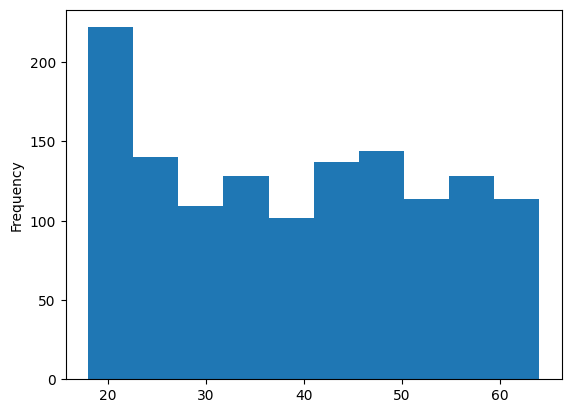

In [ ]:
### WORKING VISUALIZING THE EFFECT OF StandardScaler IN THE AGE COLUMN OF THE DATA ###
X["age"].plot(kind = "hist")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_age = StandardScaler().fit_transform(X[["age"]]) # X[["age"]] → keeps it as a DataFrame (2D), not Series (1D).
print(scaled_age) # It is a Numpy array and is also two-dimensional.
print(type(scaled_age))

[[-1.43876426]
 [-1.50996545]
 [-0.79795355]
 ...
 [-1.50996545]
 [-1.29636188]
 [ 1.55168573]]
<class 'numpy.ndarray'>


<Axes: ylabel='Frequency'>

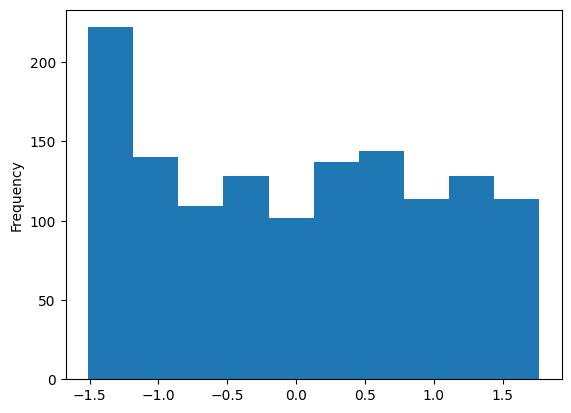

In [ ]:
# Now Converting the Numpy array to pandas Series class for plotting the values
pd.Series(scaled_age.flatten()).plot(kind = "hist") # Here the flatten() function is used to convert 2D numpy array to 1D numpy array.

# PRE-PROCESSING PART 1

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
insurance_dataframe = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [ ]:
insurance_dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Creating a ColumnTransformer object using make_column_transformer() function
ct_obj = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Dividing X (features) and y (labels)
X = insurance_dataframe.drop("charges", axis = 1)
y = insurance_dataframe["charges"]

# Splitting the data into training and testing data using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fitting the ColumnTransformer object on the training data
ct_obj.fit(X_train)

# Transforming using ColumnTransformer object i.e. ct_obj on both training and testing data
X_train_preprocessed = ct_obj.transform(X_train)
X_test_preprocessed = ct_obj.transform(X_test)

In [ ]:
print(type(X_train_preprocessed))

<class 'numpy.ndarray'>


In [ ]:
# Let's check the shape
print(X_train.shape)
print(X_train_preprocessed.shape)

# 6 --> 11 columns

(1070, 6)
(1070, 11)


# Building a neural network model to fit on our preprocessed and normalised data

In [ ]:
tf.random.set_seed(42)
# Creating a model similar to above insurance_model2
insurance_model_3 = tf.keras.Sequential([
     tf.keras.Input(shape = (11,), name = "Input"),
     tf.keras.layers.Dense(100, activation = "linear", name = "Hidden_one"),
     tf.keras.layers.Dense(10, activation = "linear", name = "Hidden_two"),
     tf.keras.layers.Dense(1, activation = "linear", name = "Output")
], name = "insurance_model_3" )

# Compiling the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
                         metrics = ["mae"])

# Summary of the model
insurance_model_3.summary()

Model: "insurance_model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_one (Dense)              │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_two (Dense)              │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,221 (8.68 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

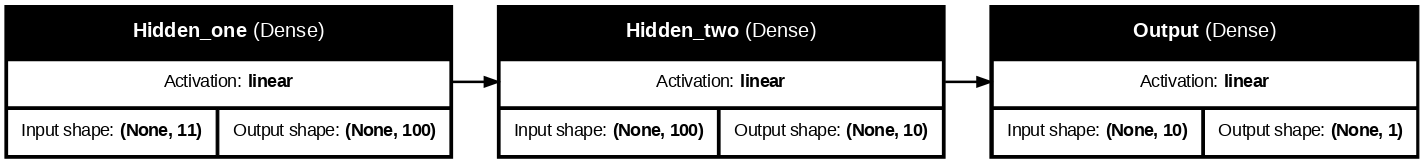

In [ ]:
# Using plot_model() function for visualizing the model
plot_model(insurance_model_3, show_shapes= True, show_layer_names=True, show_layer_activations=True, rankdir="LR", dpi=90)

In [ ]:
# Fitting the model
insurance_model_3.fit(X_train_preprocessed, y_train, epochs = 200, verbose = 1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11158.3203 - mae: 11158.3203
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5557.3477 - mae: 5557.3477
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3764.3159 - mae: 3764.3159
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3907.3525 - mae: 3907.3525
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3826.5144 - mae: 3826.5144
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3818.1667 - mae: 3818.1667
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3809.0271 - mae: 3809.0271
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3831.9905 - mae: 3831.9905
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3848.7803 - mae: 3848.7803
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3905.8901 - mae: 3905.8901
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3754.9084 - mae: 3754.9084
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [ ]:
# Evaluating the model
insurance_model_3.evaluate(X_test_preprocessed, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3501.5051 - mae: 3501.5051  


[3451.674560546875, 3451.674560546875]